<a href="https://colab.research.google.com/github/nkiro33/Digit-Recognizer/blob/main/tensorflowdigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.layers as tfl
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy, CategoricalAccuracy
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/tf project 1/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


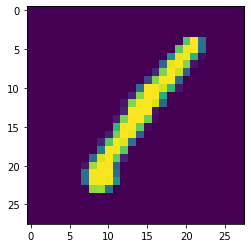

In [ ]:
sample = data.iloc[0, ] ['pixel0':'pixel783']
nparr = sample.to_numpy().reshape(28,28)
plt.imshow(nparr, interpolation='nearest')
plt.show()


In [ ]:
label = []
image = []
for i in range(len(data)):
  row = data.iloc[i, ] ['pixel0':'pixel783']
  np_array = row.to_numpy() / 255
  np_array = np_array.reshape(28,28)
  lab = np.zeros((10, ), dtype=int)
  lab[data.iloc[i,]['label']] = 1
  image.append(np_array)
  label.append(lab)


In [ ]:

X_train, X_valid, y_train, y_valid = train_test_split(image,label, train_size=0.9)
tf_X_train = tf.convert_to_tensor(X_train)
tf_y_train = tf.convert_to_tensor(y_train)
tf_X_valid = tf.convert_to_tensor(X_valid)
tf_y_valid = tf.convert_to_tensor(y_valid)
print(tf_y_train)
print(tf_X_train)
print(tf_y_valid)
print(tf_X_valid)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 2, 2, 128)       

In [ ]:
model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 2, 2, 128)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(tf_X_train, tf_y_train, epochs=15, validation_data=(tf_X_valid, tf_y_valid))

Epoch 1/15
1182/1182 [==============================] - 53s 44ms/step - loss: 0.2242 - accuracy: 0.9271 - val_loss: 0.0622 - val_accuracy: 0.9783
Epoch 2/15
1182/1182 [==============================] - 54s 45ms/step - loss: 0.0671 - accuracy: 0.9794 - val_loss: 0.0471 - val_accuracy: 0.9860
Epoch 3/15
1182/1182 [==============================] - 52s 44ms/step - loss: 0.0485 - accuracy: 0.9853 - val_loss: 0.0470 - val_accuracy: 0.9855
Epoch 4/15
1182/1182 [==============================] - 52s 44ms/step - loss: 0.0341 - accuracy: 0.9895 - val_loss: 0.0396 - val_accuracy: 0.9883
Epoch 5/15
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.0554 - val_accuracy: 0.9850
Epoch 6/15
1182/1182 [==============================] - 51s 43ms/step - loss: 0.0263 - accuracy: 0.9921 - val_loss: 0.0501 - val_accuracy: 0.9876
Epoch 7/15
1182/1182 [==============================] - 49s 42ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0443 -

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/tf project 1/test.csv")
test_image = []
for i in range(len(test)):
  row = test.iloc[i, ] ['pixel0':'pixel783']
  np_array = row.to_numpy() / 255
  np_array = np_array.reshape(28,28)
  lab = np.zeros((10, ), dtype=int)
  test_image.append(np_array)

tf_X_test = tf.convert_to_tensor(test_image)
print(tf_X_test)


tf.Tensor(
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]

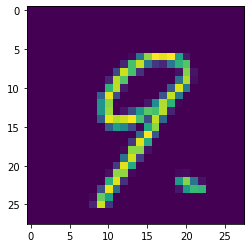

In [ ]:
plt.imshow(tf_X_test[2])

In [ ]:
prediction = model.predict(tf_X_test)

875/875 [==============================] - 16s 18ms/step


In [ ]:

y=np.argmax(prediction,axis=1)

In [ ]:
y

array([2, 0, 9, ..., 3, 9, 2])

In [ ]:
submit = pd.read_csv("/content/drive/MyDrive/tf project 1/sample_submission.csv")

In [ ]:
for i in range(len(submit)):
  submit.iloc[i,]['Label'] = y[i]

In [ ]:
submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
submit.to_csv("submission.csv")